In [1]:
#機械学習帳Chap3
#Reference:https://chokkan.github.io/mlnote/regression/03regularization.html

In [2]:
using Plots
using LinearAlgebra
using Printf
include("../src/Basic/mean.jl")
include("../src/Regression/linear_regression.jl")
include("../src/Regression/ridge_regression.jl")

ridge_regression (generic function with 2 methods)

In [3]:
# 訓練データ
x_train = [ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ]
y_train = [-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08]
# 検証データ
x_valid = [ 0.05,  0.08,  0.16,  0.28,  0.44,  0.47,  0.55,  0.63,  0.84,   0.99]
y_valid = [ 0.35,  0.58,  0.87,  0.98,  0.45,  0.01, -0.36, -0.73, -0.85,  -0.06]

10-element Vector{Float64}:
  0.35
  0.58
  0.87
  0.98
  0.45
  0.01
 -0.36
 -0.73
 -0.85
 -0.06

In [4]:
polyvalue(x, w) = sum([x^(j-1) * w[j] for j = (1:length(w))])

polyvalue (generic function with 1 method)

In [5]:
# 線形回帰：1~9次の関数による推定とMSR
let
    for d in (1:9)
        # 訓練データで学習
        X_train = [x^j for x in x_train, j in (0:d)]
        w = linear_regression(X_train, y_train)
        ŷ_train = X_train * w
        # 検証データで推定
        X_valid = [x^j for x in x_valid, j in (0:d)]
        ŷ_valid = X_valid * w
        # MSR
        msr_train = mean((ŷ_train - y_train).^2)
        msr_valid = mean((ŷ_valid - y_valid).^2)
        @printf "d=%d MSR = %.10f (training), %.10f (validation)\n" d msr_train msr_valid
    end
end

d=1 MSR = 0.2911223347 (training), 0.1731786835 (validation)
d=2 MSR = 0.2911017232 (training), 0.1724489756 (validation)
d=3 MSR = 0.0061683862 (training), 0.0089782205 (validation)
d=4 MSR = 0.0059072699 (training), 0.0086822313 (validation)
d=5 MSR = 0.0027495672 (training), 0.0052849468 (validation)
d=6 MSR = 0.0025021465 (training), 0.0060748072 (validation)
d=7 MSR = 0.0024176615 (training), 0.0083442217 (validation)
d=8 MSR = 0.0023835792 (training), 0.0061710458 (validation)
d=9 MSR = 0.0000033511 (training), 1.9439674037 (validation)


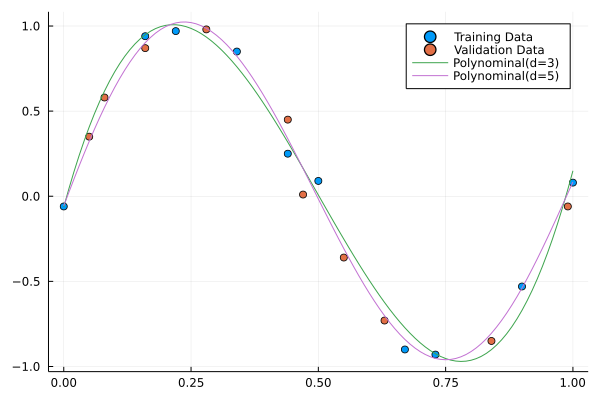

In [6]:
# 線形回帰
X3 = [x^j for x in x_train, j = (0:3)]
w3 = linear_regression(X3, y_train)
X5 = [x^j for x in x_train, j = (0:5)]
w5 = linear_regression(X5, y_train)

scatter(x_train, y_train, label="Training Data")
scatter!(x_valid, y_valid, label="Validation Data")
plot!(0.0:0.01:1.0, x -> polyvalue(x, w3), label="Polynominal(d=3)")
plot!(0.0:0.01:1.0, x -> polyvalue(x, w5), label="Polynominal(d=5)")

α = 10^-9 : L2norm(w) = 458.6911526645, MSR = 0.0067765282 (validation)
α = 10^-6 : L2norm(w) = 26.7303167727, MSR = 0.0057388898 (validation)
α = 10^-3 : L2norm(w) = 15.9454656481, MSR = 0.0162533827 (validation)
α = 1 : L2norm(w) = 0.7661357525, MSR = 0.1961916647 (validation)


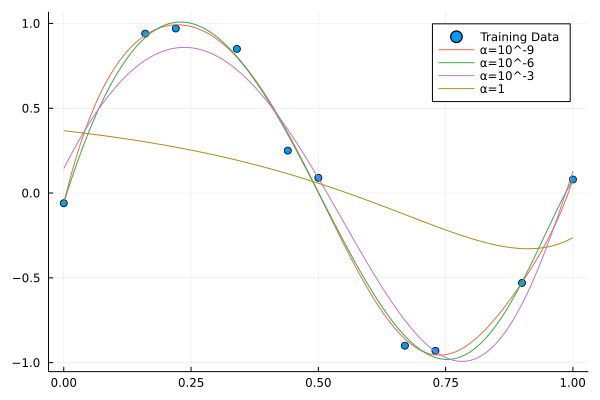

In [7]:
# リッジ回帰(9次関数)
let
    αstrs = ["10^-9","10^-6","10^-3","1"]
    αs = [10^(-9), 10^(-6), 10^(-3), 1]
    plt = scatter(x_train, y_train, label="Training Data")
    X_train = [x^j for x in x_train, j = (0:9)]
    X_valid = [x^j for x in x_valid, j = (0:9)]

    for (αstr,α) in zip(αstrs, αs)
        # リッジ回帰でパラメータを推定
        w = ridge_regression(X_train, y_train, α)
        # パラメータのL2ノルム
        l2norm = sqrt(sum(w.^2))
        # MSR
        ŷ_valid = X_valid * w
        msr_valid = mean((ŷ_valid - y_valid).^2)
        @printf "α = %s : L2norm(w) = %.10f, MSR = %.10f (validation)\n" αstr l2norm msr_valid
        plot!((0.0:0.01:1.0), x->polyvalue(x,w), label="α=$αstr")
    end
    plt
end